In [1]:
import numpy as np
from netCDF4 import Dataset as open_ncfile
import matplotlib.pyplot as plt
import glob,os
from maps_matplot_lib import defVarmme
from sklearn import linear_model

In [2]:
varname_z = defVarmme('depth'); v = 'Z'
varname_s = defVarmme('salinity'); v = 'Z'

var_z = varname_z['var_zonal_w/bowl']
var_s = varname_s['var_zonal_w/bowl']
legVar_z = varname_z['legVar']
legVar_s = varname_s['legVar']

# Read latitude and density from original file
fileh_2d = '/data/ericglod/Density_binning/Prod_density_april15/mme_hist/' \
       'cmip5.multimodel_Nat.historical.ensm.an.ocn.Omon.density_zon2D.nc'
fh2d = open_ncfile(fileh_2d, 'r')
lat = fh2d.variables['latitude'][:]; latN = len(lat)
density = fh2d.variables['lev'][:]; levN = len(density)

iniyear = 1860
indir_toe_rcphn = '/home/ysilvy/Density_bining/Yona_analysis/data/toe_zonal/toe_rcp85_histNat/hist_meanhistNat/'
listfiles_z = sorted(glob.glob(indir_toe_rcphn + '/*Depth*.nc'))
listfiles_s = sorted(glob.glob(indir_toe_rcphn + '/*Salinity*.nc'))
nmodels = len(listfiles_s)

- Reading ToE of FGOALS-g2 FGOALS-g2 with 1 members
- Reading ToE of GISS-E2-R GISS-E2-R with 3 members
- Reading ToE of HadGEM2-ES HadGEM2-ES with 2 members
- Reading ToE of IPSL-CM5A-LR IPSL-CM5A-LR with 3 members
- Reading ToE of IPSL-CM5A-MR IPSL-CM5A-MR with 1 members
- Reading ToE of MIROC-ESM-CHEM MIROC-ESM-CHEM with 1 members
- Reading ToE of MIROC-ESM MIROC-ESM with 1 members


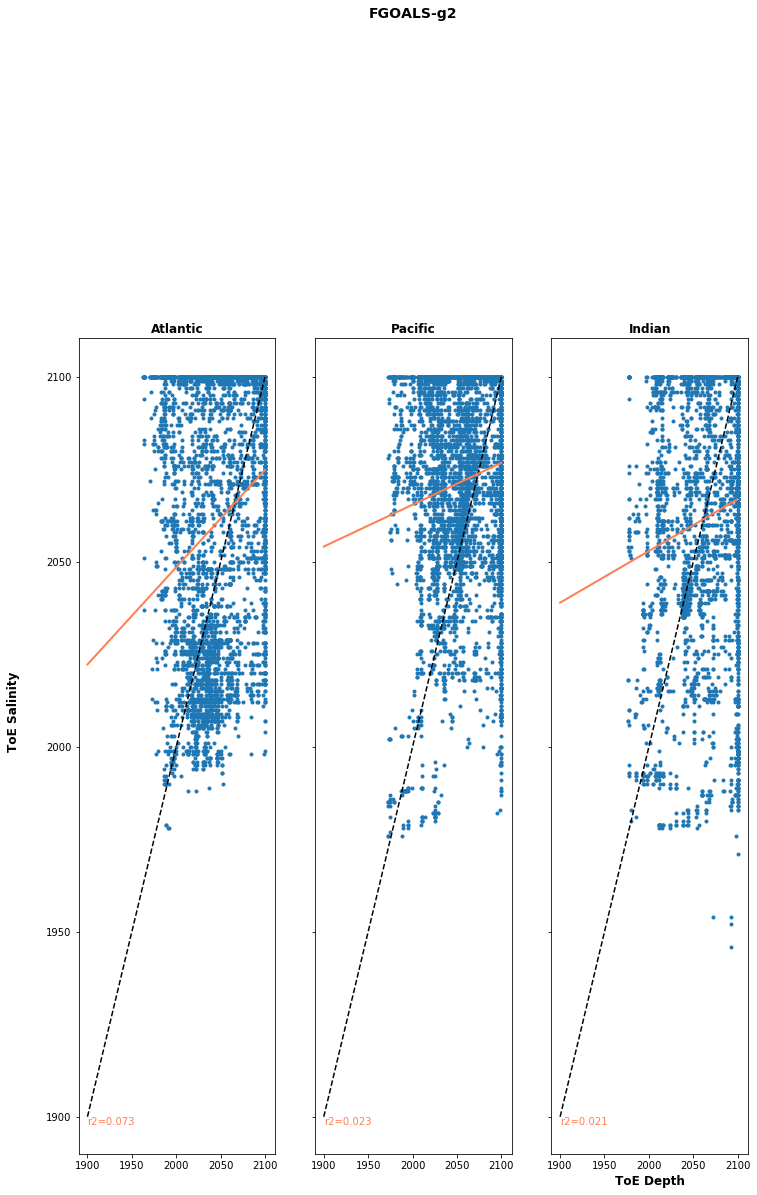

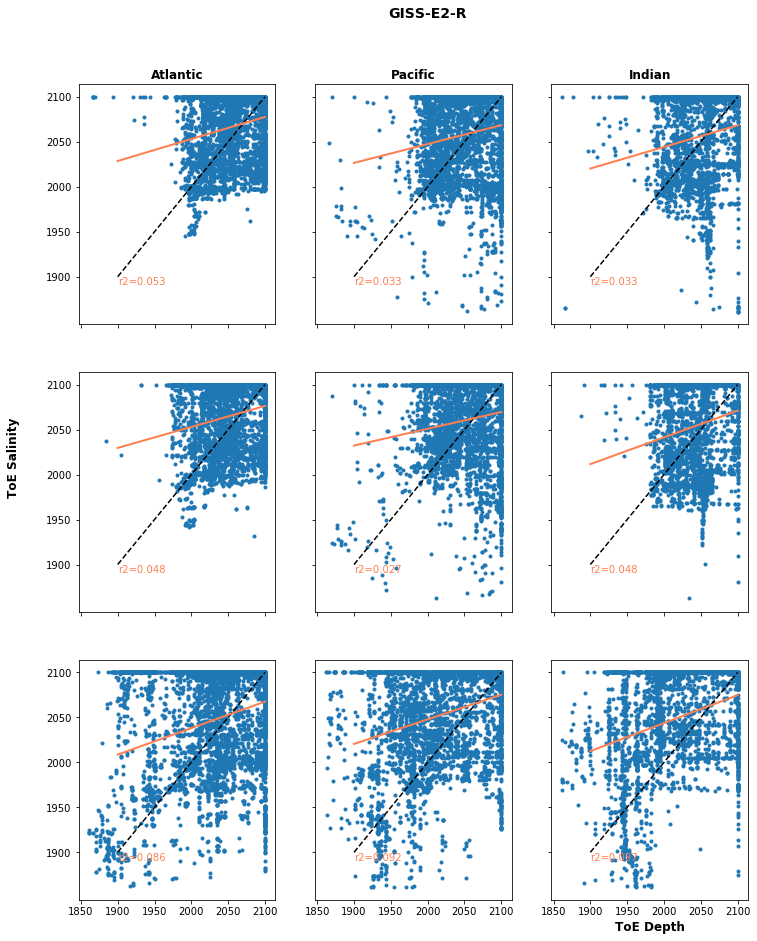

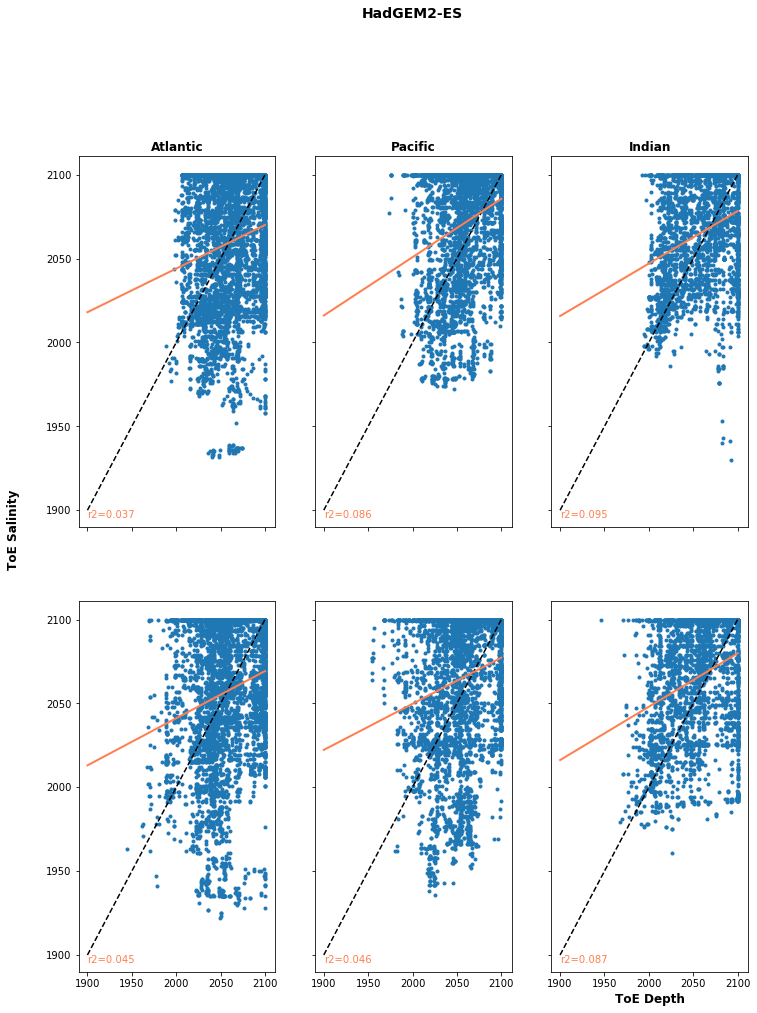

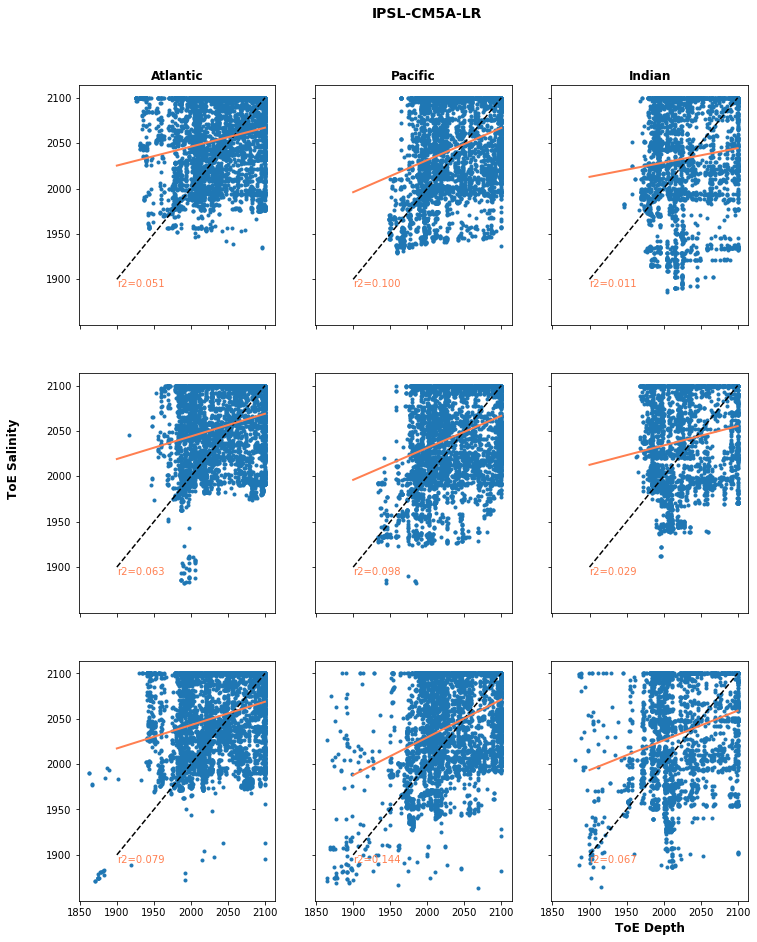

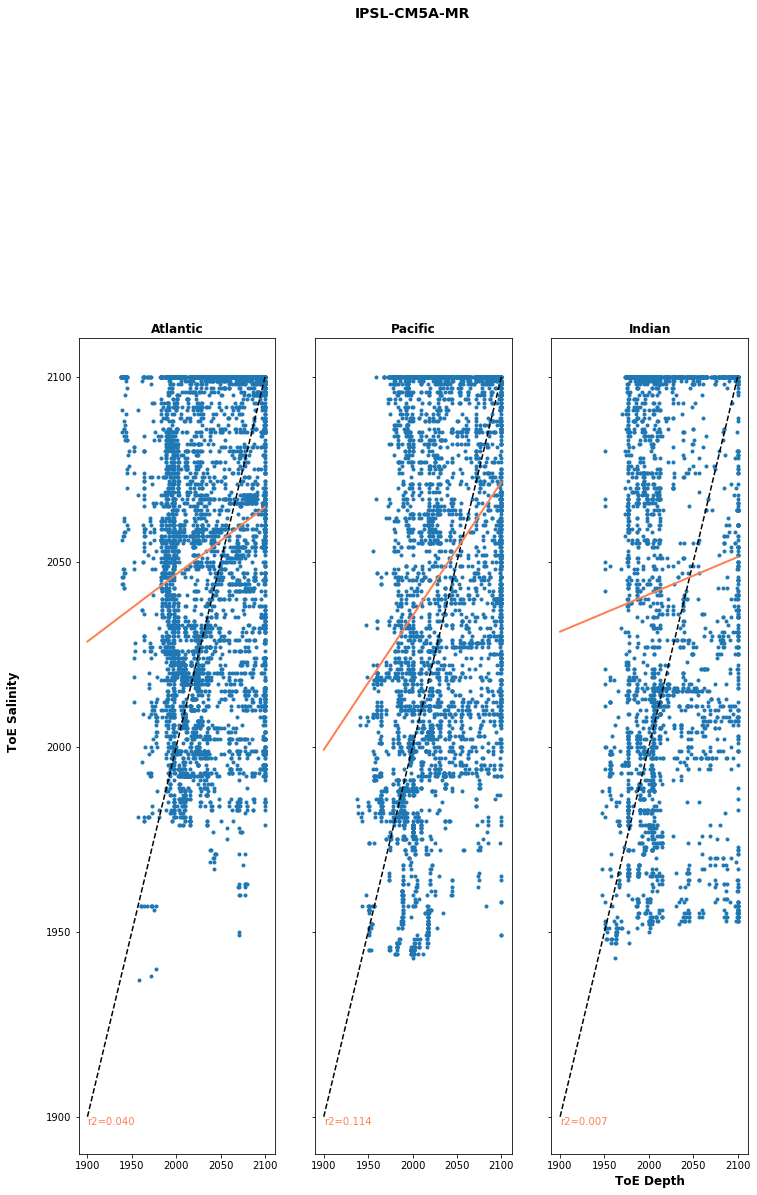

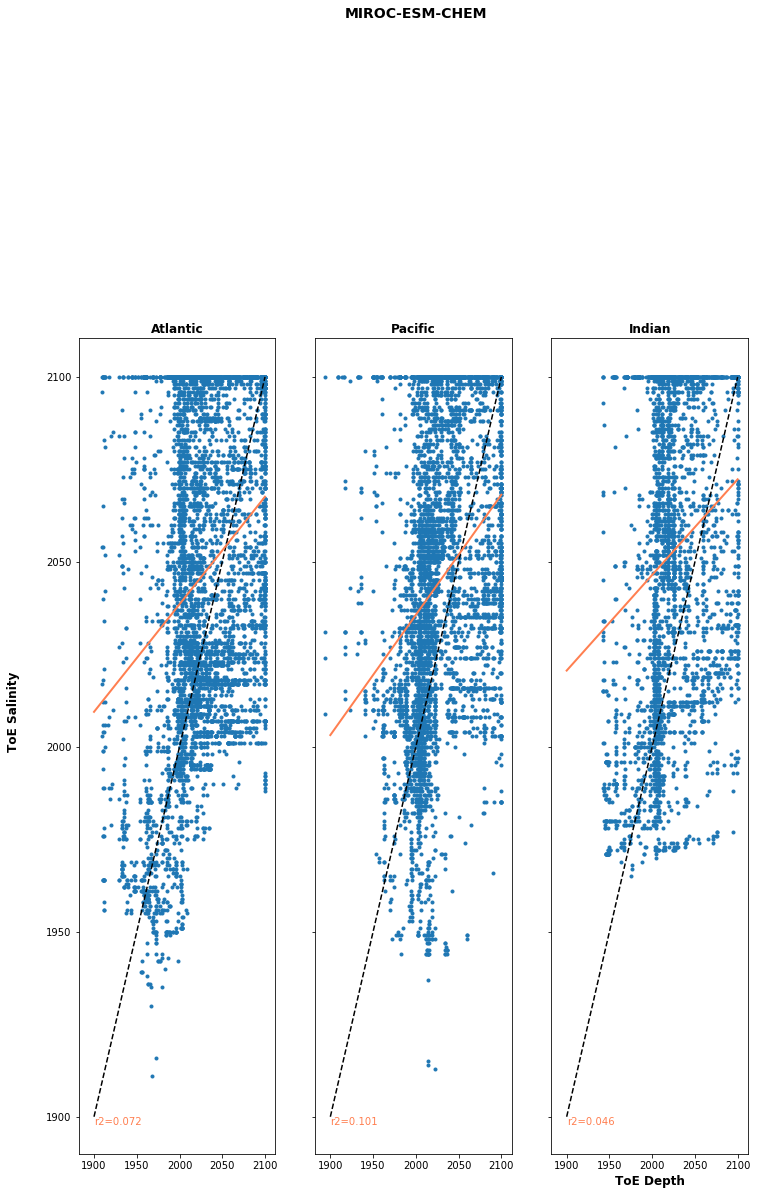

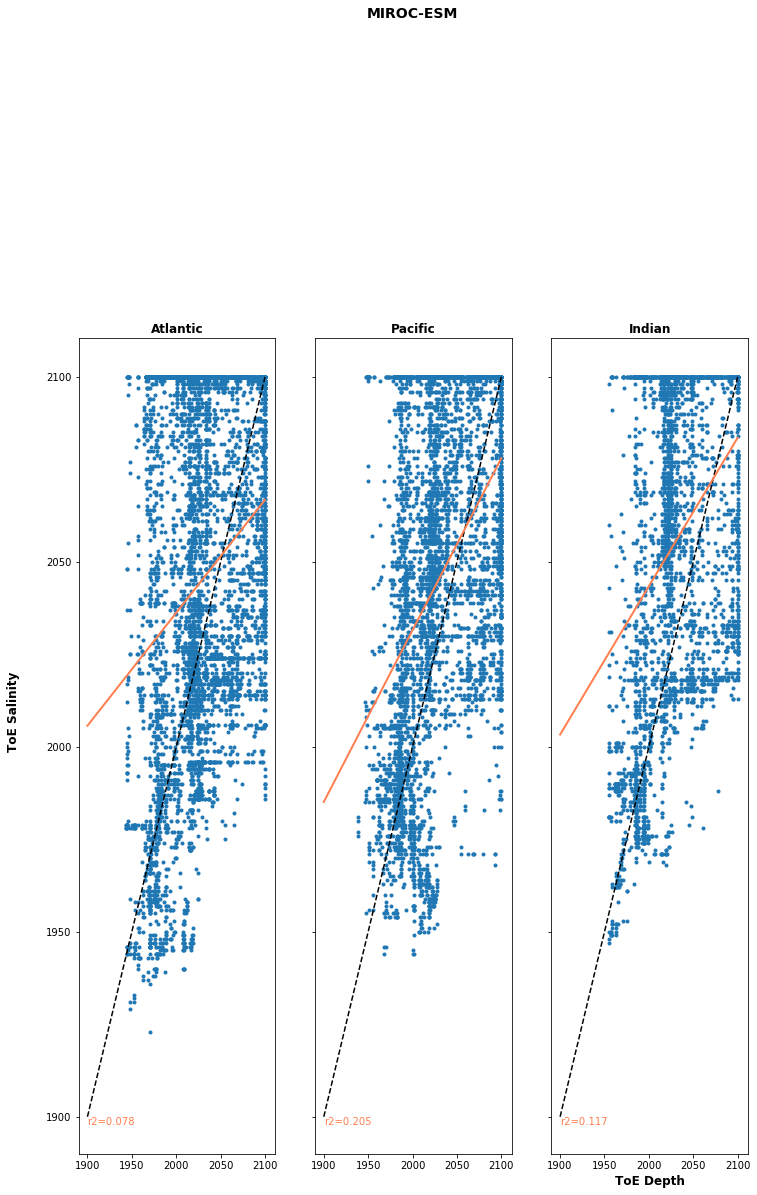

In [15]:
## Plot per model
for i in range(nmodels):
#i=0
    filez_toe = listfiles_z[i]
    ftoez = open_ncfile(filez_toe, 'r')
    namez = os.path.basename(filez_toe).split('.')[1]
    files_toe = listfiles_s[i]
    ftoes = open_ncfile(files_toe, 'r')
    names = os.path.basename(files_toe).split('.')[1]

    toeread_z = ftoez.variables[var_z + 'ToE2'][:] +iniyear
    toeread_s = ftoes.variables[var_s + 'ToE2'][:] +iniyear
    nMembers = toeread_z.shape[0]
    print('- Reading ToE of %s %s with %d members'%(namez,names,nMembers))

    toe_z = np.ma.reshape(toeread_z,(nMembers,4,latN*levN))
    toe_s = np.ma.reshape(toeread_s,(nMembers,4,latN*levN))

    fig,axes = plt.subplots(nrows=nMembers,ncols=3,figsize=(12,15),sharex=True,sharey=True)
    ax = axes.ravel().tolist()
    j=0
    for k in range(nMembers):
        for ibasin in range(1,4):
            ax[j].scatter(toe_z[k,ibasin,:],toe_s[k,ibasin,:],marker='.')
            ax[j].set_yticks([1900,1950,2000,2050,2100])
            ax[j].plot([1900,2000,2100],[1900,2000,2100], color='black', linestyle='--')
            X = np.ma.compressed(toeread_z[k,ibasin,:])
            Y = np.ma.compressed(toeread_s[k,ibasin,:])
            X = X[:,np.newaxis]
            Y = Y[:,np.newaxis]
            model = linear_model.LinearRegression()
            model.fit(X,Y)
            X_NEW = np.linspace(1900, 2100, 100)
            X_NEW = X_NEW[:,np.newaxis]
            Y_NEW = model.predict(X_NEW)
            r2 = model.score(X,Y)
            ax[j].plot(X_NEW,Y_NEW,color='coral',linewidth=2)
            ax[j].text(1900,1900,'r2=%.3f'%(r2,),va='top',color='coral')
            del(model)
            j=j+1
    ax[1].text(2000,2200,namez,fontweight='bold',va='top',fontsize=14,ha='center')
    ax[0].set_title('Atlantic',fontweight='bold')
    ax[1].set_title('Pacific',fontweight='bold')
    ax[2].set_title('Indian',fontweight='bold')
    ax[j-2].set_xlabel('ToE Depth',fontweight='bold',fontsize=12)
    plt.figtext(0.05,0.5,'ToE Salinity',fontweight='bold',fontsize=12,ha='center',rotation='vertical')
    plotName = namez+'_scatterplot_salinity_depth'
    plt.savefig('/home/ysilvy/figures/models/ToE/scatterplots/'+plotName+'.png')

In [4]:
## Plot all models
nruns = 0 # Initialize total number of runs
nrunmax = 100
nMembers = np.ma.empty(nmodels) # Initialize array for keeping number of members per model
# -- Initialize varToE containing ToE of all runs
varToEz = np.ma.masked_all((nrunmax, 4, levN, latN))
varToEs = np.ma.masked_all((nrunmax, 4, levN, latN))

for i in range(nmodels):

    filez_toe = listfiles_z[i]
    ftoez = open_ncfile(filez_toe, 'r')
    namez = os.path.basename(filez_toe).split('.')[1]
    files_toe = listfiles_s[i]
    ftoes = open_ncfile(files_toe, 'r')
    names = os.path.basename(files_toe).split('.')[1]

    toeread_z = ftoez.variables[var_z + 'ToE2'][:] +iniyear
    toeread_s = ftoes.variables[var_s + 'ToE2'][:] +iniyear
    nMembers[i] = toeread_z.shape[0]
    print('- Reading ToE of %s %s with %d members'%(namez,names,nMembers[i]))
    nruns1 = int(nruns + nMembers[i])
    
    varToEz[nruns:nruns1,:,:,:] = toeread_z
    varToEs[nruns:nruns1,:,:,:] = toeread_s

    nruns = nruns1

print('Total number of runs:', nruns)
varToEz = varToEz[0:nruns,:,:,:]
varToEs = varToEs[0:nruns,:,:,:]

- Reading ToE of CCSM4 CCSM4 with 6 members
- Reading ToE of CESM1-CAM5 CESM1-CAM5 with 3 members
- Reading ToE of CSIRO-Mk3-6-0 CSIRO-Mk3-6-0 with 9 members
- Reading ToE of CanESM2 CanESM2 with 5 members
- Reading ToE of FGOALS-g2 FGOALS-g2 with 1 members
- Reading ToE of GISS-E2-R GISS-E2-R with 3 members
- Reading ToE of HadGEM2-ES HadGEM2-ES with 2 members
- Reading ToE of IPSL-CM5A-LR IPSL-CM5A-LR with 3 members
- Reading ToE of IPSL-CM5A-MR IPSL-CM5A-MR with 1 members
- Reading ToE of MIROC-ESM-CHEM MIROC-ESM-CHEM with 1 members
- Reading ToE of MIROC-ESM MIROC-ESM with 1 members
Total number of runs: 35


In [11]:
ToEz_all = np.ma.reshape(varToEz[:,1:,:,:],(nruns*3*levN*latN))
ToEs_all = np.ma.reshape(varToEs[:,1:,:,:],(nruns*3*levN*latN))

In [15]:
ToEz_all_comp = np.ma.compressed(ToEz_all)
ToEs_all_comp = np.ma.compressed(ToEs_all)

In [ ]:
ToEz_emerge = ToEz_all_comp

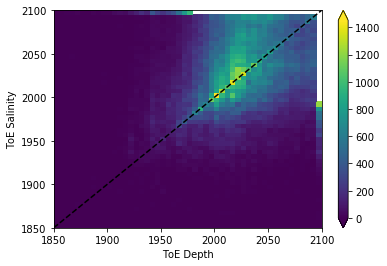

In [70]:
fig,ax = plt.subplots()
#ax.scatter(ToEz_all,ToEs_all,marker='.')
#hist2080 = ax.hist2d(ToEz_all_comp,ToEs_all_comp,bins=np.arange(1850,2081,10),cmap=plt.cm.viridis)
hist = ax.hist2d(ToEz_all_comp,ToEs_all_comp,bins=np.arange(1850,2101,5),cmax=1501)
cb=fig.colorbar(hist[3],extend='both')#,ticks=[0,5000,10000,20000,30000,40000,50000,60000,70000])
#cb.set_clim([0,5000])
ax.set_xlabel('ToE Depth')
ax.set_ylabel('ToE Salinity')
ax.plot([1850,2000,2100],[1850,2000,2100], color='black', linestyle='--')

In [10]:
varToEz[:,0,30,90,]

masked_array(data=[--, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --],
             mask=[ True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True],
       fill_value=1e+20,
            dtype=float64)